## Assignment_2
### Linear Regression Model

* Name: Anurag Banger
* Student Id: 20642433

In [2]:
from pandas.plotting import scatter_matrix
from pandas import read_csv
import pandas as pd
import numpy as np 
from matplotlib import pyplot
import seaborn as seabornInstance 

#Reading the data
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)


(506, 14)


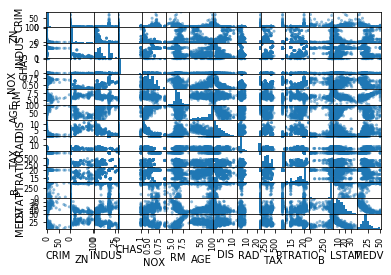

<Figure size 1440x1080 with 0 Axes>

In [3]:
#Describe and Displaying the data
print(dataset.shape)

scatter_matrix(dataset)
pyplot.figure(figsize=(20, 15))
pyplot.show()


In [4]:
print(dataset.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
print(dataset.corr())


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

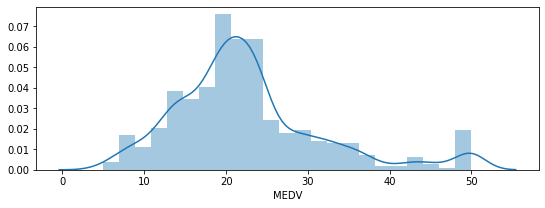

In [7]:
pyplot.figure(figsize=(9,3))
pyplot.tight_layout()
seabornInstance.distplot(dataset['MEDV'])

In [8]:
#Train Test Split
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 85
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [9]:
#KNN, SVC, and LR parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [10]:
#Linear Regression
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, Y_train) 

coeff_df = pd.DataFrame(regressor.coef_, dataset.columns.drop('MEDV'), columns=['Coefficient'])  
coeff_df


Coefficient
CRIM       -0.110900
ZN          0.048214
INDUS       0.002390
CHAS        2.669476
NOX       -20.384569
RM          3.146873
AGE         0.012821
DIS        -1.594610
RAD         0.319752
TAX        -0.012424
PTRATIO    -0.996783
B           0.008374
LSTAT      -0.571749

In [11]:
Y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df.head(25)

Actual  Predicted
0     14.8  14.868280
1     22.1  27.281833
2     19.5  19.213757
3     19.2  24.342587
4     19.4  25.964260
5     42.8  28.179739
6     24.4  23.538190
7     23.3  28.464132
8     20.6  22.702733
9     48.5  41.669042
10    33.2  32.183417
11    16.2  21.107817
12     8.3  10.196391
13    23.0  23.472528
14     7.4   5.663803
15    23.2  27.166357
16     7.5  12.942476
17    30.3  32.473298
18    20.4  20.817842
19    18.1  17.062482
20    32.2  31.093483
21    20.5  20.646620
22     9.5  12.973219
23    28.2  33.143395
24    20.7  26.111568

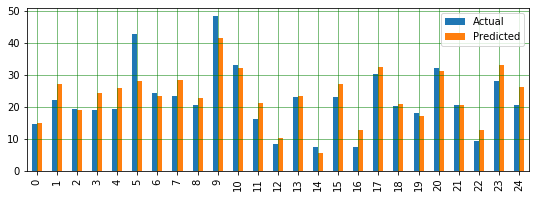

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(9,3))
pyplot.grid(which='major', linestyle='-', linewidth='0.5', color='green')
pyplot.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pyplot.show()

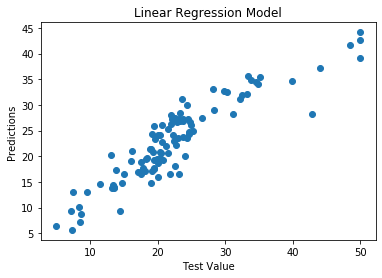

In [13]:
pyplot.scatter(Y_test, Y_pred)
pyplot.title('Linear Regression Model')
pyplot.xlabel('Test Value')
pyplot.ylabel('Predictions')
pyplot.show()

In [14]:
#Metric
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('r2_score:',metrics.r2_score(Y_test,Y_pred))
print('explained variance Score:',metrics.explained_variance_score(Y_test,Y_pred))

Mean Absolute Error: 2.7770165268624263
Mean Squared Error: 14.053146682822467
Root Mean Squared Error: 3.7487526836032363
r2_score: 0.830038858055929
explained variance Score: 0.8328922853022152
